In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA

In [3]:
path = '../data/raw/heart_2020_cleaned.csv'

In [4]:
df = pd.read_csv(path)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


The dataset has boolean, categorical, and numerical type features.<br>
The boolean features include HeartDisease, AlcoholDrinking, Stroke, DiffWalking, Diabetic, PhysicalActivity, Asthma, KidneyDisease, and SkinCancer. In preprocessing, these features can be represented with 1 to answer "Yes", or a 0 to answer "No". Sex could also be represented with a 1 for "Male" and a 0 for "Female".<br>

Categorical features include AgeCategory, Race, and GenHealth. AgeCategory and GenHealth could be represented with a numerical scale. Race could also be transformed to be represented with a lookup table but it doesn't seem necessary to transform it.<br>

Numerical features include BMI, PhysicalHealth, MentalHealth, and SleepTime. These will be scaled using sklearn's StandardScaler.


In [5]:
new_df = pd.DataFrame()

In [6]:
#function: create dummy dataframe for boolean-type columns and return the column which indicates an affirmative response.
def yes_dummies(col_name):
    return pd.get_dummies(df[col_name], prefix=col_name)[[col_name+'_Yes']]

In [7]:
#loop through all boolean-type features and create dummy-like responses.
bool_cat = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
for cat in bool_cat:
    new_df = pd.concat([new_df,yes_dummies(cat)],axis=1)
new_df.columns

Index(['HeartDisease_Yes', 'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes',
       'DiffWalking_Yes', 'Diabetic_Yes', 'PhysicalActivity_Yes', 'Asthma_Yes',
       'KidneyDisease_Yes', 'SkinCancer_Yes'],
      dtype='object')

In [8]:
new_df.head()

,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,1,0,0,0,1,1,1,0,1
1,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,0,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0


In [9]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
dummy_sex = pd.get_dummies(df['Sex'],drop_first=True).rename(columns={'Male':'Dummy_Sex'})
dummy_sex.head(3)

,Dummy_Sex
0,0
1,0
2,1


In [11]:
new_df = pd.concat([new_df, dummy_sex], axis=1)
new_df.columns

Index(['HeartDisease_Yes', 'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes',
       'DiffWalking_Yes', 'Diabetic_Yes', 'PhysicalActivity_Yes', 'Asthma_Yes',
       'KidneyDisease_Yes', 'SkinCancer_Yes', 'Dummy_Sex'],
      dtype='object')

Scaling the numerical features: BMI, PhysicalHealth, MentalHealth, and SleepTime.

In [12]:
to_scale = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
for x in to_scale:
    scaler = StandardScaler()
    scaler_df = pd.DataFrame(scaler.fit_transform(df[[x]]),columns=[x])
    new_df = pd.concat([new_df, scaler_df], axis=1)
new_df.columns

Index(['HeartDisease_Yes', 'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes',
       'DiffWalking_Yes', 'Diabetic_Yes', 'PhysicalActivity_Yes', 'Asthma_Yes',
       'KidneyDisease_Yes', 'SkinCancer_Yes', 'Dummy_Sex', 'BMI',
       'PhysicalHealth', 'MentalHealth', 'SleepTime'],
      dtype='object')

In [13]:
new_df.head(3)

,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes,Dummy_Sex,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0,1,0,0,0,1,1,1,0,1,0,-1.844750,-0.046751,3.281069,-1.460354
1,0,0,0,1,0,0,1,0,0,0,0,-1.256338,-0.424070,-0.490039,-0.067601
2,0,1,0,0,0,1,1,1,0,0,1,-0.274603,2.091388,3.281069,0.628776


Transforming the categorical responses to a numbered scale: AgeCategory, Race, GenHealth.

In [14]:
#AgeCategory
enum_age = enumerate(sorted(df['AgeCategory'].unique()))
age_lookup = {v: i for i,v in enum_age}

In [15]:
new_df = pd.concat([new_df, df[['AgeCategory']].replace(age_lookup).rename(columns={'AgeCategory':'Code_AgeCategory'})], axis=1)

In [16]:
new_df.head(3)

,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes,Dummy_Sex,BMI,PhysicalHealth,MentalHealth,SleepTime,Code_AgeCategory
0,0,1,0,0,0,1,1,1,0,1,0,-1.844750,-0.046751,3.281069,-1.460354,7
1,0,0,0,1,0,0,1,0,0,0,0,-1.256338,-0.424070,-0.490039,-0.067601,12
2,0,1,0,0,0,1,1,1,0,0,1,-0.274603,2.091388,3.281069,0.628776,9


In [17]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [18]:
GenHealth_lookup = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent':4}
new_df = pd.concat([new_df, df[['GenHealth']].replace(GenHealth_lookup).rename(columns={'GenHealth': 'Code_GenHealth'})], axis=1)

In [19]:
#The Race feature won't be codified as there isn't as much sense to transform Race to a numerical scale like what was done for the AgeCategory and GenHealth features.
#The Race feature will just be added to the new dataframe.
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [20]:
new_df = pd.concat([new_df, df['Race']],axis=1)

In [21]:
new_df.head(3)

,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes,Dummy_Sex,BMI,PhysicalHealth,MentalHealth,SleepTime,Code_AgeCategory,Code_GenHealth,Race
0,0,1,0,0,0,1,1,1,0,1,0,-1.844750,-0.046751,3.281069,-1.460354,7,3,White
1,0,0,0,1,0,0,1,0,0,0,0,-1.256338,-0.424070,-0.490039,-0.067601,12,3,White
2,0,1,0,0,0,1,1,1,0,0,1,-0.274603,2.091388,3.281069,0.628776,9,1,White


In [22]:
#export dataframe as a data set.
new_df.to_csv('../data/processed/heart_2020_preprocessed.csv')

In [35]:
pca = PCA(n_components = 2)
fitted_model = pca.fit(new_df.drop(['Race','HeartDisease_Yes'],axis=1), new_df['HeartDisease_Yes'])
model = pca.fit_transform(new_df.drop(['Race','HeartDisease_Yes'],axis=1), new_df['HeartDisease_Yes'])

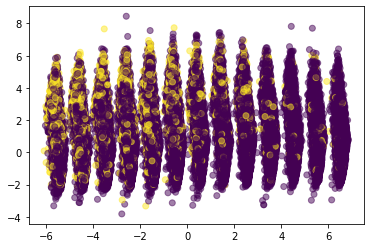

In [32]:
plt.scatter(model[:,0], model[:,1], c=new_df['HeartDisease_Yes'], alpha=0.5)
plt.show()

In [39]:
fitted_model.get_covariance()

array([[ 3.18015228e-01, -1.09252068e-03,  3.80901584e-03,
         1.75705115e-02,  1.06841420e-02, -1.30766805e-02,
         3.66544498e-03,  3.73947046e-03,  4.79791895e-03,
        -4.15796782e-03,  2.96084401e-02,  6.35824424e-02,
         3.34893431e-02, -1.05257160e-02,  2.23834038e-01,
        -7.46186438e-02],
       [-1.09252068e-03,  3.07615309e-01, -4.40272274e-04,
        -1.52678123e-03, -1.19437684e-03,  9.80459579e-04,
         1.94186513e-04, -3.97713073e-04, -1.14625770e-03,
         5.40926577e-04, -5.41595439e-04, -2.88781245e-03,
         1.58326841e-03, -1.35376204e-03, -5.30246333e-02,
         4.33613331e-03],
       [ 3.80901584e-03, -4.40272274e-04,  3.08770959e-01,
         6.18019752e-03,  3.86862261e-03, -4.53474474e-03,
         1.07605665e-03,  1.34557441e-03,  1.99092038e-03,
        -1.53721078e-03,  9.56965264e-03,  2.12675700e-02,
         9.91079031e-03, -2.75892003e-03,  9.26935135e-02,
        -2.53529111e-02],
       [ 1.75705115e-02, -1.52678123e